This is a demonstration on the new structure of the bivariate package. It now uses classes, so the way we interact with the package is a bit different. Note: as of this commit, only the files `data_setup.py` and `data_exploration.py` have been incorporated in the class.

The idea is as follows: the user can create a `BivariateDataset` object from a csv file, SURFdrive link, or a Pandas `DataFrame`. The `BivarateDatset` class contains the functionality of the original package, but all of the old functions are now methods of the new class. This cleans up the code quite a bit, since we don't have to pass the dataframe and column names to every funtion.

We can import the new class with just one line:

In [1]:
from class_dataset import Dataset
# RL: this will eventually be included in an __init__.py file in this directory

In this demonstration, I've used the same file as the one in `Test_Climate.py`. It is a file from the SURFdrive. 

In [2]:
test_folder = "https://surfdrive.surf.nl/files/index.php/s/Wg6SWc38zn8jqVg"
test_path = "subfolder01/subfolder02/Climate_Data_Washington_Metric.csv"

col_names = ["POWER", "CLOUD_BROKEN"]
col_labels = ["Power Usage [MW]", "Percentage of broken cloud coverage [ppt]"]
col_time = "DATE_TIME"

Now, we can create a `BivariateDataset` object directly from a SURFdrive link by using either the `from_surfdrive_path` or `from_surfdrive_file` classmethods:

In [3]:
bs = Dataset.import_from_surfdrive_path(
        test_folder, test_path, col_time, col_names, col_labels)

In [6]:
bs._cols

['POWER', 'CLOUD_BROKEN']

In [7]:
bs._col_labels

['Power Usage [MW]', 'Percentage of broken cloud coverage [ppt]']

The rest is really easy. For example we can clean the dataset:

In [8]:
bs.clean_dataset()

Make a time plot:

(<Figure size 720x720 with 2 Axes>,
 array([<AxesSubplot:xlabel='DATE_TIME'>, <AxesSubplot:xlabel='DATE_TIME'>],
       dtype=object))

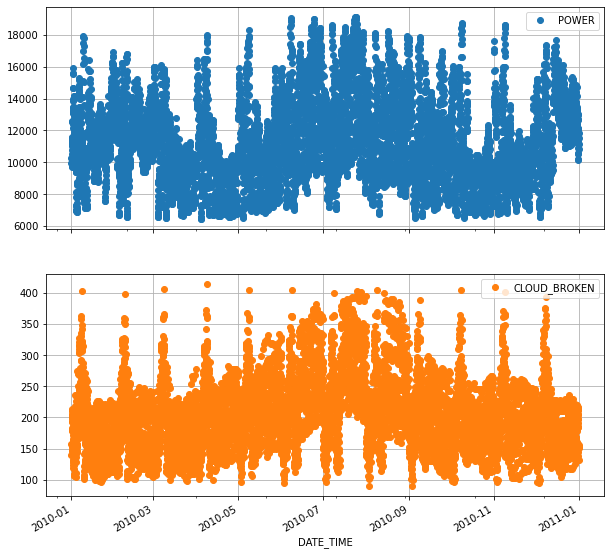

In [9]:
bs.time_plot()

Get a summary of the data:

In [ ]:
bs.data_summary()

Or make a histogram:

In [ ]:
bs.hist_plot()

In [ ]:
bs.create_ev(period='W')

In [ ]:
bs.fit_ev(var='POWER')